# Test de hipótesis

Las estimaciones puntuales y los intervalos de confianza son herramientas básicas de inferencia que sirven de base para otra técnica de inferencia: las pruebas de hipótesis estadísticas. Las pruebas de hipótesis estadísticas son un medio para determinar si los datos observados se desvían de lo esperado. La biblioteca scipy.stats de Python contiene una serie de funciones que facilitan la realización de pruebas de hipótesis.

## Fundamentos del test de hipótesis

Los test de hipótesis estadísticas se basan en una afirmación denominada hipótesis nula, que asume que no ocurre nada interesante entre las variables que se están probando. La forma exacta de la hipótesis nula varía de un tipo de prueba a otro: si se comprueba si los grupos difieren, la hipótesis nula afirma que los grupos son iguales. Por ejemplo, si quieres comprobar si la edad media de los votantes de tu estado difiere de la media nacional, la hipótesis nula sería que no hay diferencia entre las edades medias.

El propósito de un test de hipótesis es determinar si es probable que la hipótesis nula sea cierta dados los datos de la muestra. Si hay pocas pruebas en contra de la hipótesis nula dados los datos, se acepta la hipótesis nula. Si la hipótesis nula es improbable dados los datos, puede rechazar la nula a favor de la hipótesis alternativa: que está ocurriendo algo interesante. La forma exacta de la hipótesis alternativa dependerá de la prueba específica que se esté realizando. Siguiendo con el ejemplo anterior, la hipótesis alternativa sería que la edad media de los votantes de su estado difiere de hecho de la media nacional.

Una vez que se tienen las hipótesis nula y alternativa, se elige un nivel de significación (a menudo denotado por la letra griega α). El nivel de significación es un umbral de probabilidad que determina cuándo se rechaza la hipótesis nula. Tras realizar una prueba, si la probabilidad de obtener un resultado tan extremo como el que se observa debido al azar es inferior al nivel de significación, se rechaza la hipótesis nula a favor de la alternativa. Esta probabilidad de obtener un resultado tan extremo o más que el observado se conoce como valor p.

La prueba T es una prueba estadística que se utiliza para determinar si una muestra de datos numéricos difiere significativamente de la población o si dos muestras difieren entre sí.

## Prueba T de una muestra

Una prueba t de una muestra comprueba si la media de una muestra difiere de la media de la población. Creemos unos datos ficticios de edad para la población de votantes de todo el país y una muestra de votantes de Minnesota y comprobemos si la edad media de los votantes de Minnesota difiere de la de la población:

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [2]:
np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

print( population_ages.mean() )
print( minnesota_ages.mean() )

43.000112
39.26


Observa que hemos utilizado una combinación ligeramente diferente de distribuciones para generar los datos de la muestra de Minnesota, por lo que sabemos que las dos medias son diferentes. Realicemos una prueba t con un nivel de confianza del 95% y veamos si rechaza correctamente la hipótesis nula de que la muestra procede de la misma distribución que la población. Para realizar una prueba t de una muestra, podemos utilizar la función stats.**ttest_1samp()**:

In [3]:
stats.ttest_1samp(a = minnesota_ages,               # Datos de la muestra
                 popmean = population_ages.mean())  # Media popoblación

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

El resultado de la prueba muestra que el estadístico de prueba "t" es igual a -2,574. Este estadístico de prueba nos indica cuánto se desvía la media muestral de la hipótesis nula. Si el estadístico t se encuentra fuera de los cuantiles de la distribución t correspondientes a nuestro nivel de confianza y grados de libertad, rechazamos la hipótesis nula. Podemos comprobar los cuantiles con **stats.t.ppf()**:

In [4]:
stats.t.ppf(q=0.025,  # Cuantil a comprobar
            df=49)  # Grados de libertad

-2.0095752344892093

In [5]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=49)  # Degrees of freedom

2.009575234489209


Podemos calcular las probabilidades de ver un resultado tan extremo como el que observamos (conocido como valor p) pasando el estadístico t como el cuantil a la función **stats.t.cdf()**:

In [6]:
stats.t.cdf(x= -2.5742,      # Estadística de la prueba T
               df= 49) * 2   # Multiplique por dos para una prueba de dos colas

0.013121066545690117

*Nota: La hipótesis alternativa que estamos comprobando es si la media de la muestra difiere (no es igual) de la media de la población. Dado que la muestra puede diferir en sentido positivo o negativo, multiplicamos por dos.

Observe que este valor es el mismo que el valor p que aparece en el resultado de la prueba t original. Un valor p de 0,01311 significa que esperaríamos ver datos tan extremos como los de nuestra muestra debido al azar aproximadamente el 1,3% de las veces si la hipótesis nula fuera cierta. En este caso, el valor p es inferior a nuestro nivel de significación α (igual a 1-conf.nivel o 0,05), por lo que deberíamos rechazar la hipótesis nula. Si construyéramos un intervalo de confianza del 95% para la muestra, no captaría la media poblacional de 43:

In [7]:
sigma = minnesota_ages.std()/math.sqrt(50)  # Desviación estándar de la muestra/tamaño de la muestra

stats.t.interval(0.95,                        # Nivel de confianza
                 df = 49,                     # Grados de libertad
                 loc = minnesota_ages.mean(), # Media de la muestra
                 scale= sigma)                # Desviación típica estimada

(36.369669080722176, 42.15033091927782)

Por otra parte, dado que hay un 1,3% de posibilidades de que un resultado tan extremo se deba al azar, no es significativo con un nivel de confianza del 99%. Esto significa que si tuviéramos que construir un intervalo de confianza del 99%, capturaría la media de la población:

In [8]:
stats.t.interval(alpha = 0.99,                # Nivel de confianza
                 df = 49,                     # Grados de libertad
                 loc = minnesota_ages.mean(), # Media de la muestra
                 scale= sigma)                # Desviación típica estimada

(35.40547994092107, 43.11452005907893)

Con un nivel de confianza más alto, construimos un intervalo de confianza más amplio y aumentamos las probabilidades de que capte la media verdadera, con lo que es menos probable que rechacemos la hipótesis nula. En este caso, el valor p de 0,013 es mayor que nuestro nivel de significación de 0,01 y no rechazamos la hipótesis nula.

## Prueba T de dos muestras


Una prueba t de dos muestras investiga si las medias de dos muestras de datos independientes difieren entre sí. En una prueba de dos muestras, la hipótesis nula es que las medias de ambos grupos son iguales. A diferencia de la prueba de una muestra, en la que se compara con un parámetro poblacional conocido, la prueba de dos muestras sólo tiene en cuenta las medias muestrales. Puede realizar una prueba t de dos muestras pasando con la función **stats.ttest_ind()**. Generemos una muestra de los datos de edad de los votantes de Wisconsin y comparémosla con la muestra que hicimos anteriormente:

In [9]:
np.random.seed(12)
wisconsin_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
wisconsin_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
wisconsin_ages = np.concatenate((wisconsin_ages1, wisconsin_ages2))

print( wisconsin_ages.mean() )

42.8


In [10]:
stats.ttest_ind(a= minnesota_ages,
                b= wisconsin_ages,
                equal_var=False)    # Supongamos que las muestras tienen la misma varianza.

Ttest_indResult(statistic=-1.7083870793286842, pvalue=0.09073104343957748)

La prueba arroja un valor p de 0,0907, lo que significa que hay un 9% de probabilidades de que veamos datos muestrales tan alejados si los dos grupos analizados son realmente idénticos. Si utilizáramos un nivel de confianza del 95%, no rechazaríamos la hipótesis nula, ya que el valor p es superior al nivel de significación correspondiente del 5%.

## Prueba T pareada

La prueba t básica de dos muestras está diseñada para probar diferencias entre grupos independientes. En algunos casos, puede que interese comprobar las diferencias entre muestras del mismo grupo en distintos momentos. Por ejemplo, un hospital puede querer comprobar si un medicamento para adelgazar funciona comprobando el peso de los pacientes del mismo grupo antes y después del tratamiento. Una prueba t pareada permite comprobar si las medias de las muestras del mismo grupo difieren.

Podemos realizar una prueba t pareada utilizando la función de **scipy stats.ttest_rel()**. Generemos algunos datos ficticios sobre el peso de los pacientes y hagamos una prueba t pareada:

In [ ]:
np.random.seed(11)

before= stats.norm.rvs(scale=30, loc=250, size=100)

after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)

weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})

weight_df.describe()             # Comprobar un resumen de los datos

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


El resumen muestra que los pacientes perdieron alrededor de 1,23 kilos de media después del tratamiento. Realicemos una prueba t pareada para ver si esta diferencia es significativa con un nivel de confianza del 95%:

In [12]:
stats.ttest_rel(a = before,
                b = after)

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

## Error de tipo I y de tipo II

El resultado de una prueba de hipótesis estadística y la correspondiente decisión de rechazar o aceptar la hipótesis nula no son infalibles. Una prueba proporciona pruebas a favor o en contra de la hipótesis nula y entonces se decide si aceptarla o rechazarla basándose en esas pruebas, pero éstas pueden carecer de la fuerza necesaria para llegar a la conclusión correcta. Las conclusiones incorrectas obtenidas a partir de pruebas de hipótesis se clasifican en una de estas dos categorías: error de tipo I y error de tipo II.

El error de tipo I describe una situación en la que se rechaza la hipótesis nula cuando en realidad es cierta. Este tipo de error también se conoce como "falso positivo". La tasa de error de tipo I es igual al nivel de significación α, por lo que establecer un nivel de confianza más alto (y, por tanto, un alfa más bajo) reduce las posibilidades de obtener un falso positivo.

El error de tipo II describe una situación en la que no se rechaza la hipótesis nula cuando en realidad es falsa. El error de tipo II también se conoce como "falso negativo". Cuanto mayor sea el nivel de confianza, mayor será la probabilidad de cometer un error de tipo II.

Investiguemos estos errores con un gráfico:

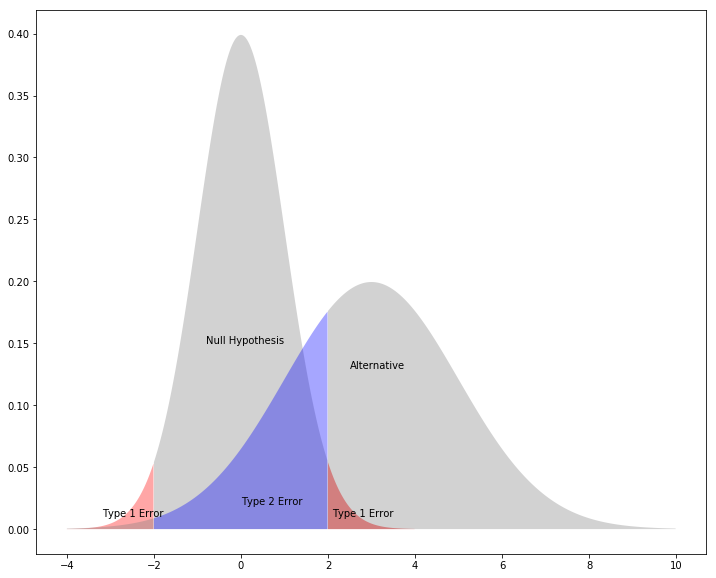

In [13]:
plt.figure(figsize=(12,10))


plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='grey',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error");

En el gráfico anterior, las zonas rojas indican errores de tipo I, suponiendo que la hipótesis alternativa no es diferente de la nula para una prueba bilateral con un nivel de confianza del 95%.

El área azul representa los errores de tipo II que se producen cuando la hipótesis alternativa es diferente de la nula, como muestra la distribución de la derecha. Observe que la tasa de error de tipo II es el área bajo la distribución alternativa dentro de los cuantiles determinados por la distribución nula y el nivel de confianza. Podemos calcular la tasa de error de tipo II para las distribuciones anteriores de la siguiente manera:

In [14]:
lower_quantile = stats.norm.ppf(0.025)  # Valor de corte inferior
upper_quantile = stats.norm.ppf(0.975)  # Valor de corte superior

# Área bajo alternativa, a la izquierda el valor de corte inferior
low = stats.norm.cdf(lower_quantile,    
                     loc=3,             
                     scale=2)

# Área bajo alternativa, a la izquierda el valor de corte superior
high = stats.norm.cdf(upper_quantile, 
                      loc=3, 
                      scale=2)          

# Área bajo la alternativa, entre los puntos de corte (error de tipo II)
high-low

0.294956061112323

Con las distribuciones normales anteriores, no podríamos rechazar la hipótesis nula en un 30% de las ocasiones, ya que las distribuciones están lo suficientemente próximas entre sí como para solaparse de forma significativa.

## Poder estadístico

La [potencia](https://es.wikipedia.org/wiki/Poder_estad%C3%ADstico) de una prueba estadística es la probabilidad de que la prueba rechace la hipótesis nula cuando la alternativa es realmente diferente de la nula. En otras palabras, la potencia es la probabilidad de que la prueba detecte que ocurre algo interesante cuando realmente *ocurre* algo interesante. La potencia es igual a uno menos la tasa de error de tipo II. La potencia de una prueba estadística está influida por:

1. El nivel de significación elegido para la prueba.
2. El tamaño de la muestra.
3. El tamaño del efecto de la prueba.

Al elegir un nivel de significación para una prueba, existe un equilibrio entre el error de tipo I y el de tipo II. Un nivel de significación bajo, como 0,01, hace que sea menos probable que una prueba tenga errores de tipo I (falsos positivos), pero más probable que tenga errores de tipo II (falsos negativos) que una prueba con un valor mayor del nivel de significación α. Una convención común es que las pruebas estadísticas deben tener una potencia de al menos 0,8.

Un mayor tamaño de la muestra reduce la incertidumbre de la estimación puntual, haciendo que la distribución de la muestra se estreche, lo que se traduce en menores tasas de error de tipo II y una mayor potencia.

[Tamaño del efecto](https://es.wikipedia.org/wiki/Tama%C3%B1o_del_efecto) es un término general que describe una medida numérica del tamaño de algún fenómeno. Existen muchas medidas diferentes del tamaño del efecto que surgen en diferentes contextos. En el contexto de la prueba T, un tamaño del efecto simple es la diferencia entre las medias de las muestras. Este número puede estandarizarse dividiéndolo por la desviación típica de la población o la desviación típica conjunta de las muestras. Esto pone el tamaño del efecto en términos de desviaciones estándar, por lo que un tamaño del efecto estandarizado de 0,5 se interpretaría como que la media de una muestra está a 0,5 desviaciones estándar de otra (en general, 0,5 se considera un tamaño del efecto "grande").

Dado que la potencia estadística, el nivel de significación, el tamaño del efecto y el tamaño de la muestra están relacionados, es posible calcular cualquiera de ellos para valores dados de los otros tres. Esto puede ser una parte importante del proceso de diseño de una prueba de hipótesis y del análisis de los resultados. Por ejemplo, si desea realizar una prueba con un nivel de significación determinado (digamos el estándar 0,05) y una potencia determinada (digamos el estándar 0,8) y está interesado en un tamaño del efecto determinado (digamos 0,5 para la diferencia estandarizada entre las medias muestrales), puede utilizar esa información para determinar el tamaño de la muestra que necesita.

En python, la biblioteca statsmodels contiene funciones para resolver cualquier parámetro de la potencia de las pruebas T. Utilice **statsmodels.stats.power.tt_solve_power** para pruebas t de una muestra y **statsmodels.stats.power.tt_ind_solve_power** para una prueba t de dos muestras. Comprobemos el tamaño de la muestra que debemos utilizar dados los valores de los parámetros estándar anteriores para una prueba t de una muestra:

In [15]:
from statsmodels.stats.power import tt_solve_power

tt_solve_power(effect_size = 0.5,
               alpha = 0.05,
               power = 0.8)

33.3671314275208

En este caso, querríamos un tamaño de muestra de al menos 34 para hacer un estudio con la potencia y el nivel de significación deseados, capaz de detectar un tamaño de efecto grande.

# Wrap Up

La prueba t es una potente herramienta para investigar las diferencias entre las medias de la muestra y de la población. Las pruebas t se aplican a variables numéricas.

# Siguiente lección: [Tests de Chi-cuadrado](5-Tests_de_chi-cuadrado.ipynb)